# Predicting The Likelihood Of E-Signing A Loan Based On Financial History.

Lending companies work by analysing the financial history of their loan applicants, and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement campaigns. Other times lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leeds of possible applicants. Some example marketplaces include Upstart, Lending Tree, and Lending Club. In this project, we are going to assess the quality of the leads our company receives from these types of marketplaces.

- **Market:** The target audience are the loan applicants who reached out through an intermediary marketplace.


- **Product:** The loan.


- **Goal:** Develop a model to predict the 'quality' applicants. In this case study, 'quality' applicants are those who reach a key part of the loan application process.

- In this case study, we will be working for a fintech company that specialises with loans. It offers low APR loans to applicants based on their financial habits, as almost all lending companies do. The company has partnered with a P2P lending marketplace that provides real-time leads (load applicants). The number of conversions from these leads are satisfactory.
- The company has tasked us with creating a model that predicts whether or not these leads will complete the electronic signature phase of the loan application (a.k.a. e_signed). The company seeks to leverage this model to identify less 'quality' applicants (e.g. those who are not responding to the onboarding process), and experiment with giving them different onboarding screens.
- The reason for selecting the e-signing process as the response variable is due to the structure of the loan application.
- The official application begins with the lead arriving into our website after we opted to acquire it. Here, the applicant begins the onboarding process to apply for a loan. The users begin to provide more financial information by going over every screen of the onboarding process. The first phase ends with the applicant providing his/her signature indicating all of the given information is correct.
- Any of the following screens, in which the applicant is approved/denied and given the terms of the loan, is dependent on the company, not the applicant. Therefore the effectiveness of the onboarding is measured up to the moment the applicant stops having control of the application process.

### Data

- Because the applicants arrived through a marketplace, we have access to their financial data before the onboarding process begins. This data includes personal information like age and the time employed, as well as other financial metrics. Our company utilises these financial data points to create risk scores based on many different risk factors.
- In this case study, we are given the set of scores from algorithms built by the financial and engineering teams. Furthermore, the marketplace itself provides us with their own lead quality scores. We will leverage both sets of scores, as well as a small list of personal/financial features to predict if the user is likely to respond to our current onboarding process.

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('Financial_Data.csv')

# Visualising The Dataset

In [3]:
ds.shape

(17908, 21)

In [4]:
ds.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
ds.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
ds.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

# Taking Care Of Missing Data

In [8]:
# From the below, we observe no missing data.
ds.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

# Histograms

In [9]:
# We're dropping the fields we do not require for our correlation analysis 

ds2 = ds.drop(columns = ['entry_id', 'pay_schedule','e_signed'])

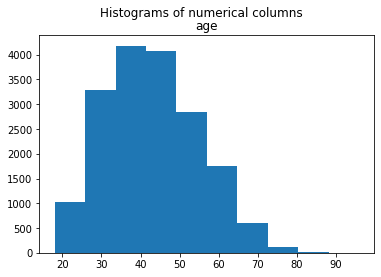

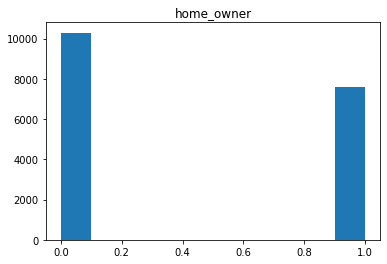

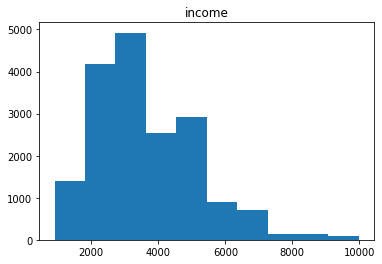

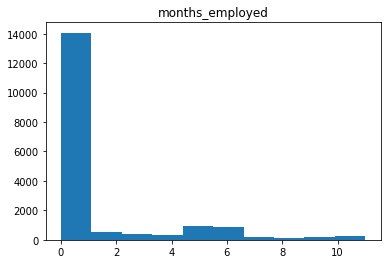

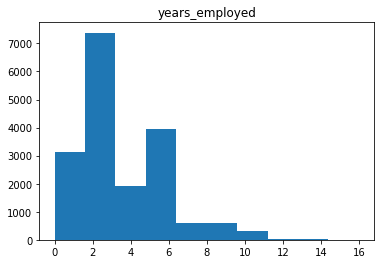

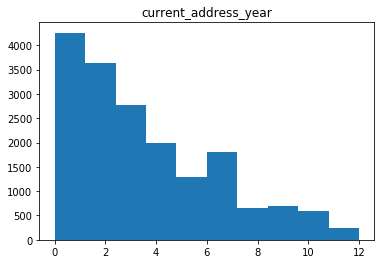

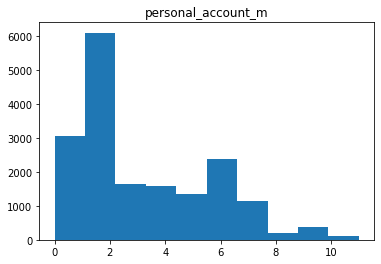

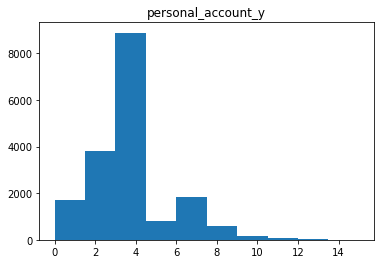

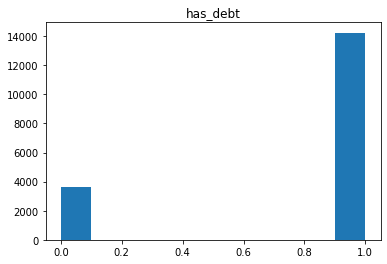

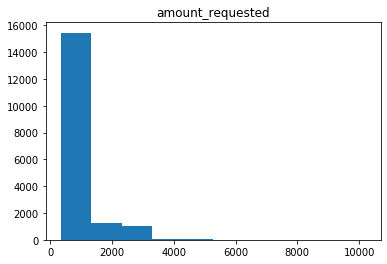

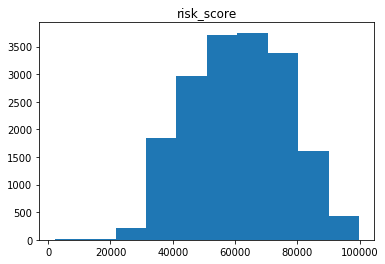

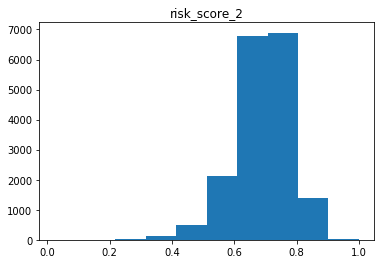

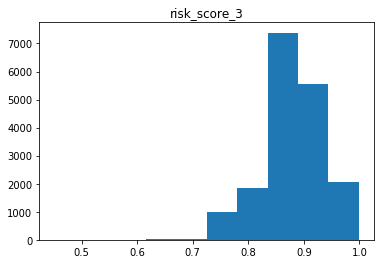

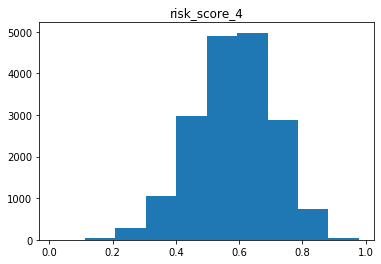

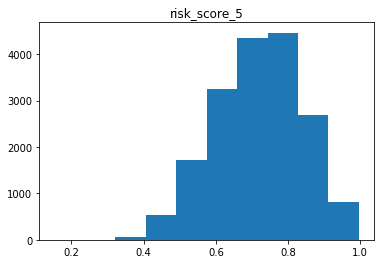

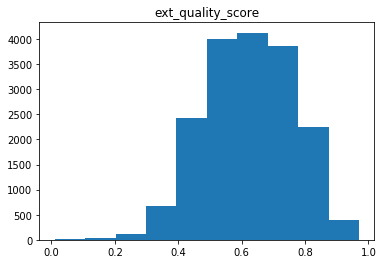

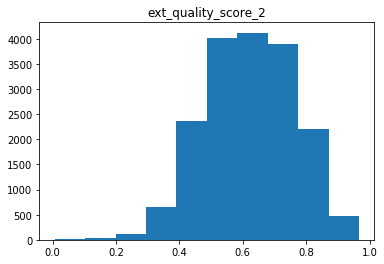

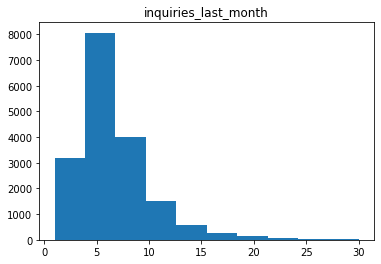

In [10]:
plt.suptitle('Histograms of numerical columns')
for i in ds2.columns:
    plt.title(i)
    plt.hist(ds[i])
    plt.show()

# Correlation Plot

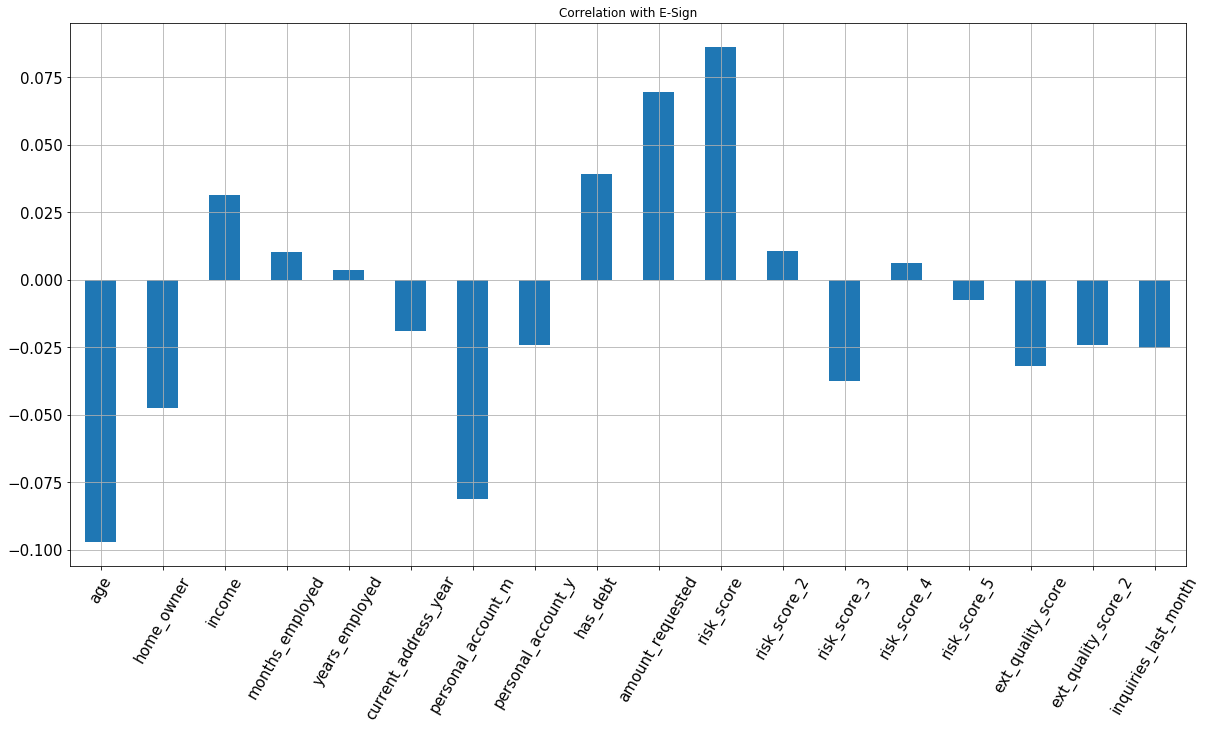

In [11]:
ds2.corrwith(ds['e_signed']).plot.bar(figsize = (20,10), title = 'Correlation with E-Sign', 
                                      fontsize = 15, rot = 60, grid = True)

# Correlation Matrix

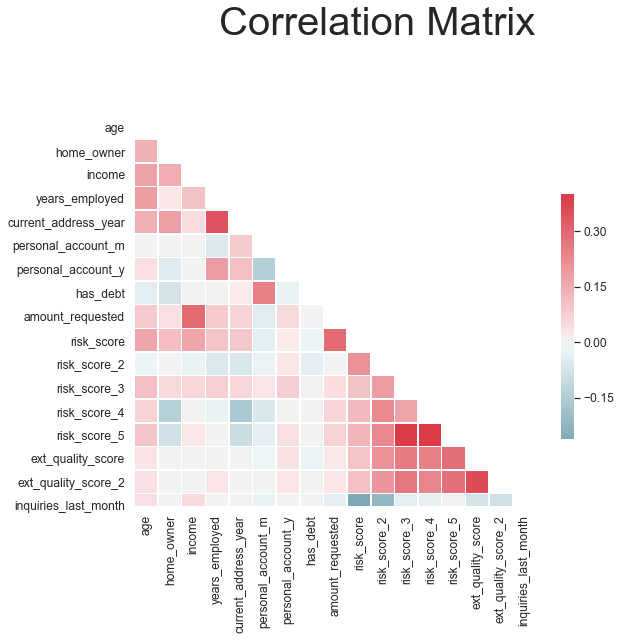

In [12]:
# Correlation matrix of independent variables

sns.set(style = 'white', font_scale = 1.1) # Builds the background

# Compute the correlation matrix
corr = ds.drop(columns = ['entry_id', 'pay_schedule','e_signed','months_employed']).corr() # Creating a 2D array of each correlation feature to each other

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True # This creates a the lower diagonal of the matrix as it is symmetrical

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize = (9,9)) # Size of the plot
fig.suptitle("Correlation Matrix", fontsize = 40) # Title

# Generate a custom diverging colourmap

cmap = sns.diverging_palette(220, 10, as_cmap = True) # Colouring

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.4, center = 0, 
            square = True, linewidth = 0.5, cbar_kws = {'shrink': 0.5})

# Observations

# The older you are, the more likely it is that you will be a home owner, the higher your
# income will be and the more years you will be employed.
# The amount requested is higher if your income is higher.
# The longer someone has lived at their current address, the longer they will be employed.
# The risk scores are all correlated to each other.

In [13]:
ds = ds.drop(columns = 'months_employed')

In [14]:
ds.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [15]:
# We wish to remove the months and year columns and have one column that captures the same information.

ds['personal_account_months'] = (ds.personal_account_m + (ds.personal_account_y * 12))

In [16]:
ds[['personal_account_m','personal_account_y','personal_account_months']]

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98
...,...,...,...
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18


In [17]:
ds = ds.drop(columns = ['personal_account_m','personal_account_y'])

In [18]:
ds.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


# Encoding Categorical Variables

In [19]:
ds = pd.get_dummies(ds)

In [20]:
ds.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

# Avoiding The Dummy Variable Trap

In [21]:
# We observe that the 'pay_schedule' variable has been encoded. 
# The resulting columns are linearly dependent. If we remove one column, they will become
# linearly independent.

ds = ds.drop(columns = 'pay_schedule_semi-monthly')

# Removing Extra Columns

In [22]:
response = ds['e_signed']
users = ds['entry_id']
ds = ds.drop(columns = ['e_signed','entry_id'])

In [23]:
ds.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,30,1,0,0
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,86,0,0,1
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,19,0,0,1
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,86,1,0,0
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,98,0,0,0


# Splitting The Dataset Into The Training Set and Test Set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds, response, test_size = 0.2, random_state = 0)

# Feature Scaling

**Note:** The Standard Scaler returns a numpy array of multiple dimensions. The problem with this process is that it loses the column names and index. The index is how we identify each set of fields to the user, and we would like the column names to be build within our model. We therefore save the scaled part into a different data frame by converting the result of the Standard Scaler into its data frame.

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [26]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [27]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [28]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [29]:
X_train = X_train2
X_test = X_test2

# Fitting The Logistic Regression To The Dataset

**Note:** Penalty l1 will penalise any particular field that is strongly correlated to the response variable. If one type of variable is highly correlated to the response variable, the Penalty l1 will penalise this to ensure that particular variable does not end up with a large coefficient in the correlation equations.

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, penalty = 'l1')
lr.fit(X_train, y_train)

/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicting the test set values

y_pred = lr.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 652 1002]
 [ 567 1361]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



In [34]:
accuracy_score(y_test, y_pred)

0.5619765494137353

In [35]:
# (True Positives)/(True Positives + False Positives) => Of all the positives predicted, 
# how many of them are correct.
precision_score(y_test, y_pred)

0.5759627592044012

In [36]:
# (True Positives)/(True Positives + False Negatives)
# => Of all the positives that truly exist, how many did we predict as true.
recall_score(y_test, y_pred)

0.7059128630705395

In [37]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.6343509671405266

In [38]:
# K-Fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
accuracy_mean = accuracies.mean()
accuracy_std = accuracies.std()
print(accuracy_mean)
print(accuracy_std)

0.5773429257892042
0.00890823551829192


In [39]:
results = pd.DataFrame([['Logistic Regression', accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]], 
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.561977,0.575963,0.705913,0.634351


# Fitting The SVM To The Dataset

In [41]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
# Predicting the test set results

y_pred = svc.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 617 1037]
 [ 509 1419]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58      0.74      0.65      1928

    accuracy                           0.57      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.57      0.55      3582



In [45]:
accuracy_score(y_test, y_pred)

0.5683975432719152

In [46]:
# (True Positives)/(True Positives + False Positives) => Of all the positives predicted, 
# how many of them are correct.
precision_score(y_test, y_pred)

0.5777687296416938

In [47]:
# (True Positives)/(True Positives + False Negatives)
# => Of all the positives that truly exist, how many did we predict as true.
recall_score(y_test, y_pred)

0.7359958506224067

In [49]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.6473540145985401

In [50]:
# K-Fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
accuracy_mean = accuracies.mean()
accuracy_std = accuracies.std()
print(accuracy_mean)
print(accuracy_std)

0.5796455930127353
0.008571335162295586


In [51]:
results2 = pd.DataFrame([['SVM (Linear)', accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]], 
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [52]:
results = results.append(results2, ignore_index = True)

In [53]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


# Fitting The Kernel SVM To The Dataset

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
# Predicting the test set results

y_pred = svc.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 787  867]
 [ 596 1332]]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1654
           1       0.61      0.69      0.65      1928

    accuracy                           0.59      3582
   macro avg       0.59      0.58      0.58      3582
weighted avg       0.59      0.59      0.59      3582



In [58]:
accuracy_score(y_test, y_pred)

0.5915689558905639

In [59]:
# (True Positives)/(True Positives + False Positives) => Of all the positives predicted, 
# how many of them are correct.
precision_score(y_test, y_pred)

0.6057298772169167

In [60]:
# (True Positives)/(True Positives + False Negatives)
# => Of all the positives that truly exist, how many did we predict as true.
recall_score(y_test, y_pred)

0.6908713692946058

In [62]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.6455052095953476

In [63]:
# K-Fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
accuracy_mean = accuracies.mean()
accuracy_std = accuracies.std()
print(accuracy_mean)
print(accuracy_std)

0.6110601864163512
0.013584015781886095


In [64]:
results3 = pd.DataFrame([['SVM (RBF)', accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]], 
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [65]:
results = results.append(results3, ignore_index = True)

In [66]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505


# Fitting The Random Forrest To The Dataset

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
# Predicting the test set results

y_pred = rfc.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 918  736]
 [ 619 1309]]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1654
           1       0.64      0.68      0.66      1928

    accuracy                           0.62      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.62      0.62      3582



In [71]:
accuracy_score(y_test, y_pred)

0.6217197096594081

In [72]:
# (True Positives)/(True Positives + False Positives) => Of all the positives predicted, 
# how many of them are correct.
precision_score(y_test, y_pred)

0.6400977995110024

In [73]:
# (True Positives)/(True Positives + False Negatives)
# => Of all the positives that truly exist, how many did we predict as true.
recall_score(y_test, y_pred)

0.678941908713693

In [75]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.658947898313617

In [82]:
# K-Fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
accuracy_mean = accuracies.mean()
accuracy_std = accuracies.std()
print(accuracy_mean)
print(accuracy_std)

0.6262761959337427
0.01250631032693875


In [77]:
results4 = pd.DataFrame([['Random Forest Classifier (n = 100)', accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]], 
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [78]:
results = results.append(results4, ignore_index = True)

In [79]:
# We observe that the Random Forest Classifier performs the best.

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest Classifier (n = 100),0.621720,0.640098,0.678942,0.658948


# Parameter Tuning - Grid Search CV (Round 1)

**Note:** We will be using the criterion, or 'splitting criterion', 'entropy' and 'gini'. The main difference between the two is that entropy maximises the informational content the random forest has after every split. The gini criterion minimises the probability of mislabelling. Therefore the gini criterion splits the data in a way that it values not mislabelling the terminal leaves. 

In [86]:
import time

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,None], 'max_features':[1,5,10], 
              'min_samples_split':[2,5,10], 'min_samples_leaf':[1,5,10],
              'bootstrap':[True, False], 'criterion':['entropy','gini']}
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
t0 = time.time()
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
t1 = time.time()
print('Time elapsed is:', (t1-t0), 'seconds')

Time elapsed is: 2891.063802957535 seconds


In [91]:
best_accuracy, best_params

(0.6363953650705012,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

# Parameter Tuning - Grid Search CV (Round 2)

In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,None], 'max_features':[8,10,12], 
              'min_samples_split':[2,3], 'min_samples_leaf':[1,2,3],
              'bootstrap':[True], 'criterion':['gini']}
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
t0 = time.time()
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
t1 = time.time()
print('Time elapsed is:', (t1-t0), 'seconds')

Time elapsed is: 535.5106370449066 seconds


In [94]:
best_accuracy, best_params

(0.6322071757643446,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 3,
  'min_samples_split': 2})

# Predicting The Test Set Results With The Optimal Parameters

In [95]:
y_pred = grid_search.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 910  744]
 [ 581 1347]]


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1654
           1       0.64      0.70      0.67      1928

    accuracy                           0.63      3582
   macro avg       0.63      0.62      0.62      3582
weighted avg       0.63      0.63      0.63      3582



In [99]:
accuracy_score(y_test, y_pred)

0.6300949190396427

In [100]:
# (True Positives)/(True Positives + False Positives) => Of all the positives predicted, 
# how many of them are correct.
precision_score(y_test, y_pred)

0.6441893830703013

In [101]:
# (True Positives)/(True Positives + False Negatives)
# => Of all the positives that truly exist, how many did we predict as true.
recall_score(y_test, y_pred)

0.6986514522821576

In [103]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.6703159990047275

In [104]:
# K-Fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
accuracy_mean = accuracies.mean()
accuracy_std = accuracies.std()
print(accuracy_mean)
print(accuracy_std)

0.6262761959337427
0.01250631032693875


In [105]:
results5 = pd.DataFrame([['Random Forest Classifier (n = 100) + Tuning', accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]], 
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [106]:
results = results.append(results5, ignore_index = True)

In [107]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest Classifier (n = 100),0.621720,0.640098,0.678942,0.658948
4,Random Forest Classifier (n = 100) + Tuning,0.630095,0.644189,0.698651,0.670316


# Final Results

In [111]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id','e_signed','predictions']]

In [112]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1


# Conclusion

Our model has given us an accuracy of around 63%. WIth this, we have an algorithm that can help predict whether or not a user will complete the e-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customised onboarding. This means that when a lead arrives from the marketplace, they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimise how many people drop off from the funnel. This funnel of screens is as effective as we, as a company, build it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalise the loan application, we can attempt to get more than 40% of the predicted not to finish the process to complete the e-sign step. If we can do this, then we can drastically increase profits. Many lending companies provide hundreds of loans every day, gaining money from each one. As a result, if we can increase the number of loan takers, we are increasing profits with this model. Although simple models may not be perfect, they can surely indicate where/how the company's finite resources may be reallocated to improve profits.